In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('TRAIN_CHURN.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
# checking unique values from these two columns.
# turns out both have 'nan' type data

print(f"region category unique = {df['region_category'].unique()}")
print(f"offer types unique = {df['preferred_offer_types'].unique()}")

region category unique = ['Village' 'City' 'Town' nan]
offer types unique = ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]


In [5]:
# checking the proportion of 'nan' at 'Region Category' column

print(df.region_category.value_counts(normalize=True, dropna=False))

Town       0.381920
City       0.344318
NaN        0.146734
Village    0.127027
Name: region_category, dtype: float64


In [6]:
# checking the proportion of 'nan' at 'Region Category' column

print(df.preferred_offer_types.value_counts(normalize=True, dropna=False))

Gift Vouchers/Coupons       0.333829
Credit/Debit Card Offers    0.331801
Without Offers              0.326584
NaN                         0.007785
Name: preferred_offer_types, dtype: float64


In [7]:
# checking all-over data
# turns out dataset's row is imbalanced, not just two of the above.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [8]:
# checking the dependent variable (Y) values
# is there any -1 rating?

df['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [9]:
# decided to drop -1 value because (assumed) it's not valid

df = df[df['churn_risk_score'] != -1]

df['churn_risk_score'].value_counts()

3    10424
4    10185
5     9827
2     2741
1     2652
Name: churn_risk_score, dtype: int64

In [10]:
# dropping all of the nan or null data from dataset

df.dropna(inplace=True)

In [11]:
# checking any null or nan data

df.isna().any().any()

False

In [12]:
# dataset's row is balanced now

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27472 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   27472 non-null  object 
 1   Name                          27472 non-null  object 
 2   age                           27472 non-null  int64  
 3   gender                        27472 non-null  object 
 4   security_no                   27472 non-null  object 
 5   region_category               27472 non-null  object 
 6   membership_category           27472 non-null  object 
 7   joining_date                  27472 non-null  object 
 8   joined_through_referral       27472 non-null  object 
 9   referral_id                   27472 non-null  object 
 10  preferred_offer_types         27472 non-null  object 
 11  medium_of_operation           27472 non-null  object 
 12  internet_option               27472 non-null  object 
 13  l

**DATA PRE-PROCESSING**

Gender Column

In [13]:
# one-hot-encoding this column because the data type is categorical

pd.get_dummies(df, columns=['gender'], prefix='', prefix_sep='').head()

,customer_id,Name,age,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,F,M,Unknown
0,fffe4300490044003600300030003800,Pattie Morrisey,18,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,1,0,0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,1,0,0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,0,1,0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,1,0,0
5,fffe43004900440036003300320035003300,Leslie Browder,13,PSG1LGF,City,Gold Membership,2016-01-08,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,06:46:07,23,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3,0,1,0


In [14]:
# turns out there are 'unknown' data

df['gender'].value_counts(normalize=True)

F          0.500000
M          0.498508
Unknown    0.001492
Name: gender, dtype: float64

In [15]:
# replacing the 'unknown' data with the majority data

df['gender'].replace({'Unknown':'F'},inplace=True)


df.loc[df['gender'] == 'Unknown']


df['gender'].value_counts()

F    13777
M    13695
Name: gender, dtype: int64

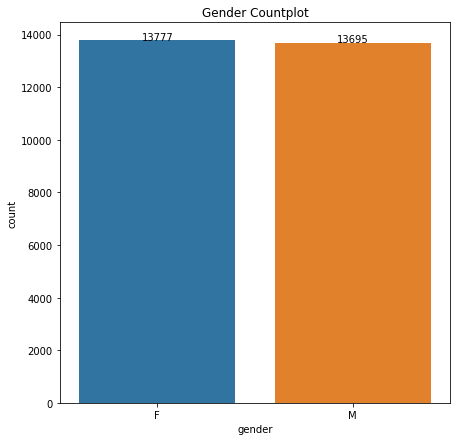

In [16]:
# make data visualization using countplot
# majority of the user is female

fig,ax1 = plt.subplots(figsize=(7,7))
graph = sns.countplot(ax = ax1 ,x = 'gender', data=df)
graph.set_xticklabels(graph.get_xticklabels())
plt.title('Gender Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,df['gender'].value_counts()[i],ha="center")
    i += 1

Age Column

In [17]:
# categorize age into two category
# 16 - 21 = teen
# above that = adult
# and checking the missing value

teen = []
adult = []

for i in df['age']:
    if i >= 16 and i <= 21:
        teen.append(i)
    else:
        adult.append(i)

print(f"jumlah teen = {len(teen)}")
print(f"jumlah adult = {len(adult)}")
print(f"total = {len(adult)+len(teen)}, no missing value")

jumlah teen = 3005
jumlah adult = 24467
total = 27472, no missing value


In [18]:
# make two dataframes consist of 'teen' and 'adult' data
# concating the two dataframes by columns

df_teen = pd.DataFrame(teen, columns=['teen'])
df_adult = pd.DataFrame(adult, columns=['adult'])

df_age = pd.concat([df_teen,df_adult], axis=1)

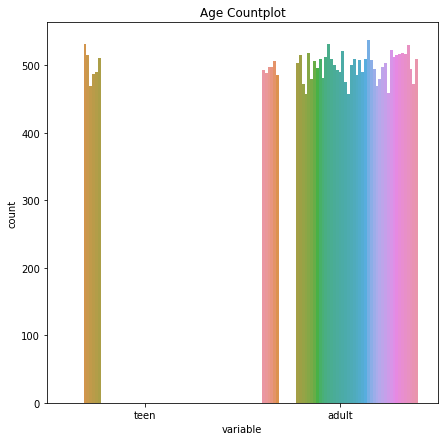

In [19]:
# make data visualization using countplot
# majority of the user is adult

fig,ax2 = plt.subplots(figsize=(7,7))
graph = sns.countplot(x="variable", hue="value", data=pd.melt(df_age));

ax2.get_legend().remove()
plt.title('Age Countplot');

Region Category Column

In [20]:
# checking the data if it's clean

df['region_category'].value_counts()

Town       12323
City       11021
Village     4128
Name: region_category, dtype: int64

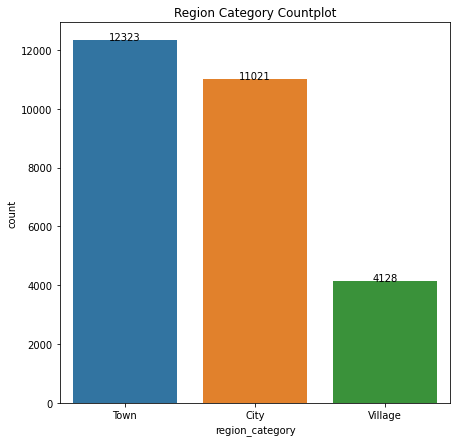

In [21]:
# make data visualization using countplot
# majority of the user's region is town - city - village

fig, ax3 = plt.subplots(figsize=(7,7))
graph = sns.countplot(data=df, ax = ax3, x = 'region_category', order= df['region_category'].value_counts().index);
plt.title('Region Category Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 1, df['region_category'].value_counts()[i], ha="center")
    i += 1

Membership Category Column

In [22]:
# checking if the data is clean

df['membership_category'].value_counts()

Basic Membership       5704
No Membership          5701
Gold Membership        5036
Silver Membership      4489
Premium Membership     3315
Platinum Membership    3227
Name: membership_category, dtype: int64

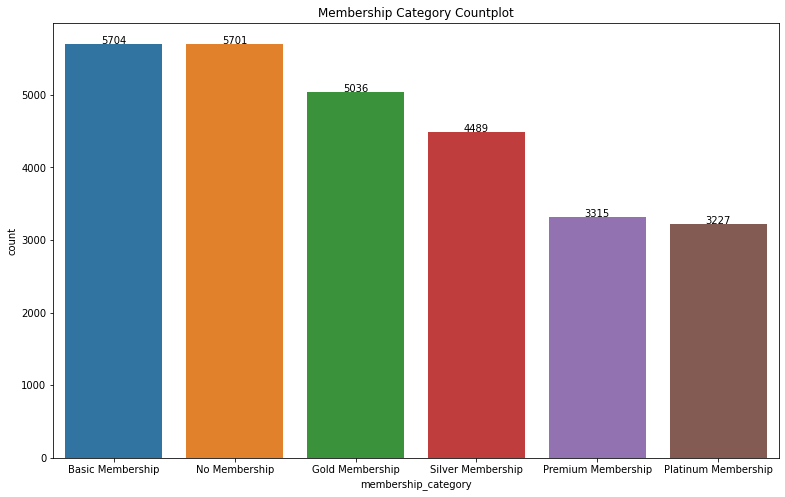

In [23]:
# data visualization using countplot
# the majority membership of the user is basic - no - gold - silver - premium - platinum

fig, ax4 = plt.subplots(figsize=(13,8))
graph = sns.countplot(data=df, ax = ax4, x = 'membership_category', order= df['membership_category'].value_counts().index);
plt.title('Membership Category Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 1, df['membership_category'].value_counts()[i], ha="center")
    i += 1

Joined Through Referral Column

In [24]:
# checking the value of this column
# turns out it has '?' data

df['joined_through_referral'].value_counts()

No     11812
Yes    11606
?       4054
Name: joined_through_referral, dtype: int64

In [25]:
# replacing '?' with majority data

df['joined_through_referral'].replace({'?':'No'},inplace=True)

df['joined_through_referral'].value_counts()


No     15866
Yes    11606
Name: joined_through_referral, dtype: int64

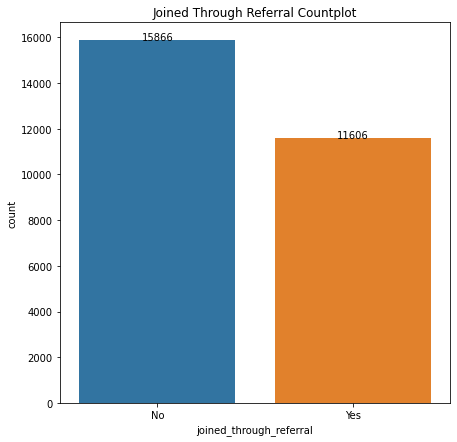

In [26]:
# data visualizing using countplot
# majority of the user didn't join through referral

fig, ax5 = plt.subplots(figsize=(7,7))
graph = sns.countplot(data=df, ax = ax5, x = 'joined_through_referral', order= df['joined_through_referral'].value_counts().index);
plt.title('Joined Through Referral Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 1, df['joined_through_referral'].value_counts()[i], ha="center")
    i += 1

Preffered Offer Types Column

In [27]:
# checking the data if it's clean

df['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       9257
Credit/Debit Card Offers    9190
Without Offers              9025
Name: preferred_offer_types, dtype: int64

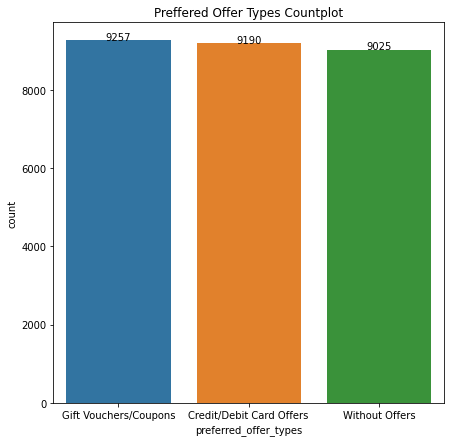

In [28]:
# data visualizing using countplot
# majority of the user prefer using gift vouchers / coupons

fig, ax6 = plt.subplots(figsize=(7,7))
graph = sns.countplot(data=df, ax = ax6, x = 'preferred_offer_types', order= df['preferred_offer_types'].value_counts().index);
plt.title('Preffered Offer Types Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 1, df['preferred_offer_types'].value_counts()[i], ha="center")
    i += 1

Medium of Operation Column

In [29]:
# checking the data if it's clean
# turns out it has '?' data

df['medium_of_operation'].value_counts()

Smartphone    10371
Desktop       10266
?              3985
Both           2850
Name: medium_of_operation, dtype: int64

In [30]:
# replacing the '?' data with the majority data

df['medium_of_operation'].replace({'?':'Smartphone'},inplace=True)

df['medium_of_operation'].value_counts()

Smartphone    14356
Desktop       10266
Both           2850
Name: medium_of_operation, dtype: int64

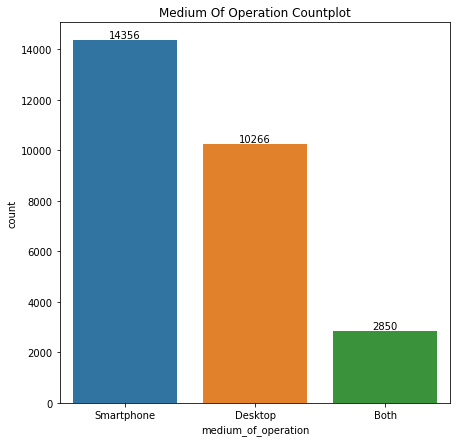

In [31]:
# data visualizing using countplot
# majority of the user uses smartphone as the medium of operation

fig, ax7 = plt.subplots(figsize=(7,7))
graph = sns.countplot(data=df, ax = ax7, x = 'medium_of_operation', order= df['medium_of_operation'].value_counts().index);
plt.title('Medium Of Operation Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.2, df['medium_of_operation'].value_counts()[i], ha="center", va='bottom')
    i += 1

Internet Option Column

In [32]:
# checking the data if it's clean

df['internet_option'].value_counts()

Mobile_Data    9203
Wi-Fi          9150
Fiber_Optic    9119
Name: internet_option, dtype: int64

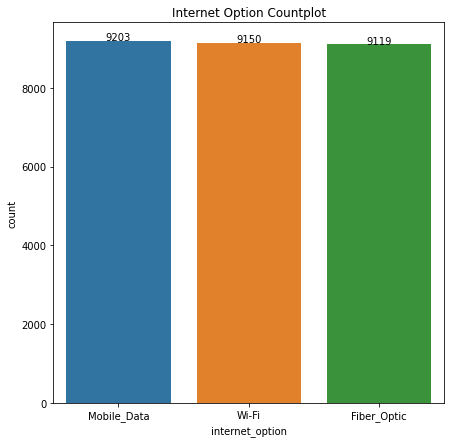

In [33]:
# visualizing data using counplot
# majority of the user uses mobile data - wifi - fiber optic as an internet option

fig, ax8 = plt.subplots(figsize=(7,7))
graph = sns.countplot(data=df, ax = ax8, x = 'internet_option', order= df['internet_option'].value_counts().index);
plt.title('Internet Option Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 1, df['internet_option'].value_counts()[i], ha="center")
    i += 1

Day Since Last Login Column

In [34]:
# checking any negative, inf, null, and zero data

print((df[['days_since_last_login']] <= 0).any())
print((df[['days_since_last_login']] == np.inf).any())
print((df[['days_since_last_login']] == -np.inf).any())
print((df[['days_since_last_login']] == np.nan).any())

days_since_last_login    True
dtype: bool
days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool


In [35]:
# replacing the negative data with median
# using log to re-fix the data distribution

df['days_since_last_login'] = np.where(df['days_since_last_login'] 
                                < 0,0,df['days_since_last_login'])

med = df['days_since_last_login'].median()

df['days_since_last_login'] = np.where(df['days_since_last_login'] 
                                <= 0,med,df['days_since_last_login'])

#df['days_since_last_login'] = np.log(df['days_since_last_login'])

In [36]:
# re-check any negative, inf, null, and zero data

print((df[['days_since_last_login']] <= 0).any())
print((df[['days_since_last_login']] == np.inf).any())
print((df[['days_since_last_login']] == -np.inf).any())
print((df[['days_since_last_login']] == np.nan).any())

days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool


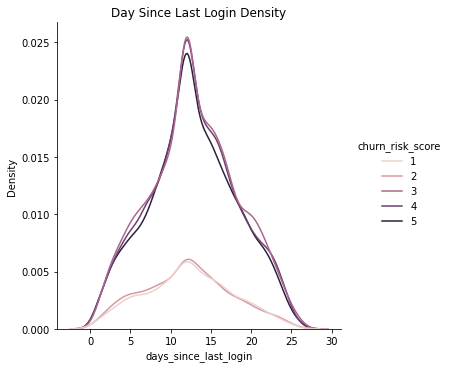

In [37]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='days_since_last_login', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Day Since Last Login Density');

Avg Time Spent Column

In [38]:
# checking any negative, inf, null, and zero data

print((df[['avg_time_spent']] <= 0).any())
print((df[['avg_time_spent']] == np.inf).any())
print((df[['avg_time_spent']] == -np.inf).any())
print((df[['avg_time_spent']] == np.nan).any())

avg_time_spent    True
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool


In [39]:
# replacing the negative data with median

df['avg_time_spent'] = np.where(df['avg_time_spent'] 
                        < 0,0,df['avg_time_spent'])

med2 = df['avg_time_spent'].median()

df['avg_time_spent'] = np.where(df['avg_time_spent'] 
                        <= 0,med2,df['avg_time_spent'])

In [40]:
# re-check any negative, inf, null, and zero data

print((df[['avg_time_spent']] <= 0).any())
print((df[['avg_time_spent']] == np.inf).any())
print((df[['avg_time_spent']] == -np.inf).any())
print((df[['avg_time_spent']] == np.nan).any())

avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool


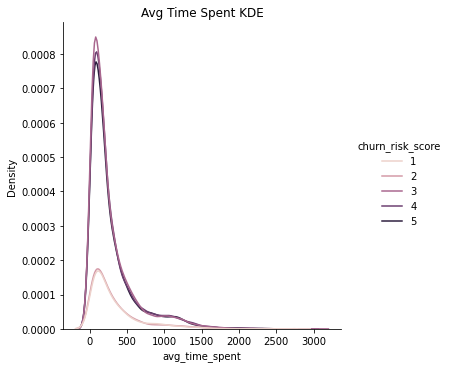

In [41]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='avg_time_spent', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Avg Time Spent KDE');

Avg Transaction Value Column

In [42]:
# checking any negative, inf, null, and zero data

print((df[['avg_transaction_value']] <= 0).any())
print((df[['avg_transaction_value']] == np.inf).any())
print((df[['avg_transaction_value']] == -np.inf).any())
print((df[['avg_transaction_value']] == np.nan).any())

avg_transaction_value    False
dtype: bool
avg_transaction_value    False
dtype: bool
avg_transaction_value    False
dtype: bool
avg_transaction_value    False
dtype: bool


In [43]:
# using log to re-fix the data distribution

df['avg_transaction_value'] = np.log(df['avg_transaction_value'])

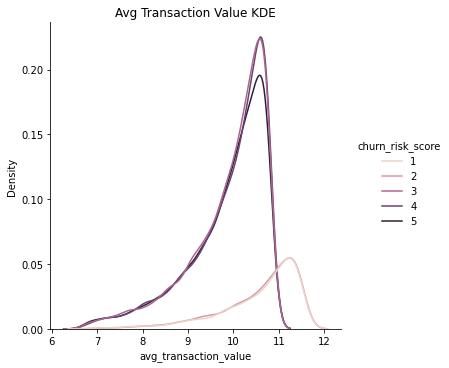

In [44]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='avg_transaction_value', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Avg Transaction Value KDE');

Avg Frequency Login Days Column

In [45]:
# checking the value of the column
# turns out there are 'Error' data

df['avg_frequency_login_days'].value_counts()

Error                  2619
13.0                   1039
14.0                   1016
8.0                    1014
17.0                   1003
                       ... 
52.72486203561419         1
-16.694641617568223       1
-8.26411518543324         1
56.16197924247753         1
27.8399274405269          1
Name: avg_frequency_login_days, Length: 1213, dtype: int64

In [46]:
# replacing 'Error' data with zero
# then, casting the column's data type into numeric

df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] == 'Error', 
                                 0,df['avg_frequency_login_days'])

df['avg_frequency_login_days'] = pd.to_numeric(df["avg_frequency_login_days"])

In [47]:
# checking any negative, inf, null, and zero data

print((df[['avg_frequency_login_days']] <= 0).any())
print((df[['avg_frequency_login_days']] == np.inf).any())
print((df[['avg_frequency_login_days']] == -np.inf).any())
print((df[['avg_frequency_login_days']] == np.nan).any())

avg_frequency_login_days    True
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool


In [48]:
# replacing negative data with zero
# replacing zero with median
# using log to re-fix the data distribution

df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] <= 0, 
                                 0,df['avg_frequency_login_days'])
                                 
median0 = df['avg_frequency_login_days'].median()

df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] <= 0, 
                                 median0,df['avg_frequency_login_days'])

df['avg_frequency_login_days'] = np.log(df['avg_frequency_login_days'])

df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] <= 0, 
                                 median0,df['avg_frequency_login_days'])

In [49]:
# re-check any negative, inf, null, and zero data

print((df[['avg_frequency_login_days']] <= 0).any())
print((df[['avg_frequency_login_days']] == np.inf).any())
print((df[['avg_frequency_login_days']] == -np.inf).any())
print((df[['avg_frequency_login_days']] == np.nan).any())

avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool


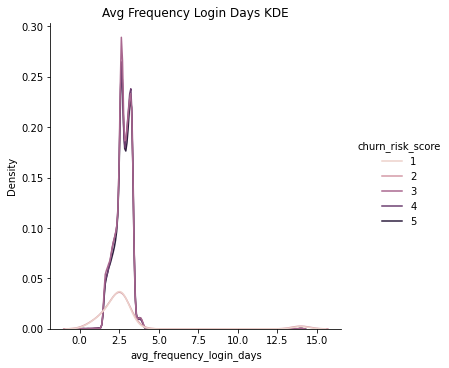

In [50]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='avg_frequency_login_days', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Avg Frequency Login Days KDE');

Points in Wallet Column

In [51]:
# checking any negative, inf, null, and zero data

print((df[['points_in_wallet']] <= 0).any())
print((df[['points_in_wallet']] == np.inf).any())
print((df[['points_in_wallet']] == -np.inf).any())
print((df[['points_in_wallet']] == np.nan).any())

points_in_wallet    True
dtype: bool
points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool


In [52]:
df['points_in_wallet'] = np.where(df['points_in_wallet'] < 0 
                         ,0,df['points_in_wallet'])

median = df['points_in_wallet'].median()

df['points_in_wallet'] = df['points_in_wallet'].replace({0.0 : median})

In [53]:
# re-check any negative, inf, null, and zero data

print((df[['points_in_wallet']] <= 0).any())
print((df[['points_in_wallet']] == np.inf).any())
print((df[['points_in_wallet']] == -np.inf).any())
print((df[['points_in_wallet']] == np.nan).any())

points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool


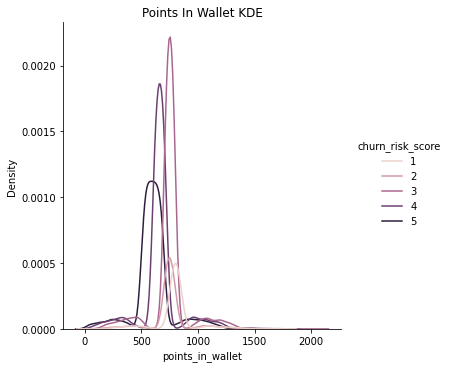

In [54]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='points_in_wallet', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Points In Wallet KDE');

Used Special Discount Column

In [55]:
# checking the value of this column

df['used_special_discount'].value_counts()

Yes    15084
No     12388
Name: used_special_discount, dtype: int64

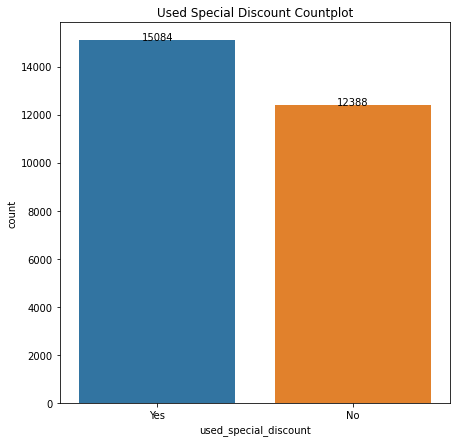

In [56]:
# visualising data using count plot
# majority of the user used special discount

fig, ax9 = plt.subplots(figsize=(7,7))
graph = sns.countplot(data=df, ax = ax9, x = 'used_special_discount', order= df['used_special_discount'].value_counts().index);
plt.title('Used Special Discount Countplot');

i=0
for p in graph.patches:
    height = p.get_height();
    graph.text(p.get_x() + p.get_width() / 2, height + 1, df['used_special_discount'].value_counts()[i], ha="center");
    i += 1;

Offer Application Preference Column

In [57]:
df['offer_application_preference'].value_counts()

Yes    15221
No     12251
Name: offer_application_preference, dtype: int64

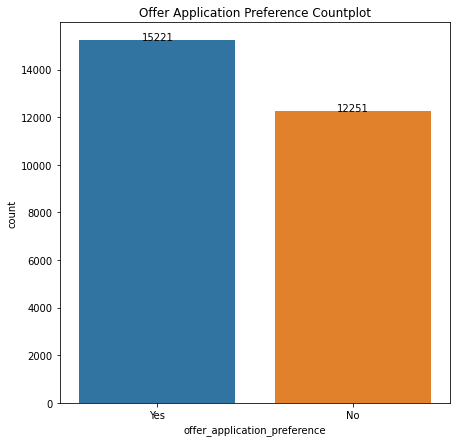

In [58]:
# visualizing data using count plot
# majority of the user prefer the application offer

fig, ax10 = plt.subplots(figsize=(7,7))
graph = sns.countplot(data=df, ax = ax10, x = 'offer_application_preference', order= df['offer_application_preference'].value_counts().index);
plt.title('Offer Application Preference Countplot');

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 1, df['offer_application_preference'].value_counts()[i], ha="center")
    i += 1

Past Complaint Column

In [59]:
# checking the value of this column

df['past_complaint'].value_counts()

No     13768
Yes    13704
Name: past_complaint, dtype: int64

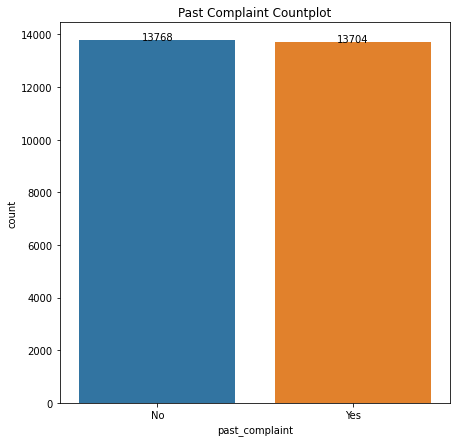

In [60]:
# visualizing the data using count plot
# majority of the user did not complaint in the past

fig, ax11 = plt.subplots(figsize=(7,7))
graph = sns.countplot(data=df, ax = ax11, x = 'past_complaint', order= df['past_complaint'].value_counts().index);
plt.title('Past Complaint Countplot');

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 1, df['past_complaint'].value_counts()[i], ha="center")
    i += 1

Complaint Status Column

In [61]:
# checking the value of this columns

df['complaint_status'].value_counts()

Not Applicable              13768
Unsolved                     3468
Solved in Follow-up          3424
Solved                       3410
No Information Available     3402
Name: complaint_status, dtype: int64

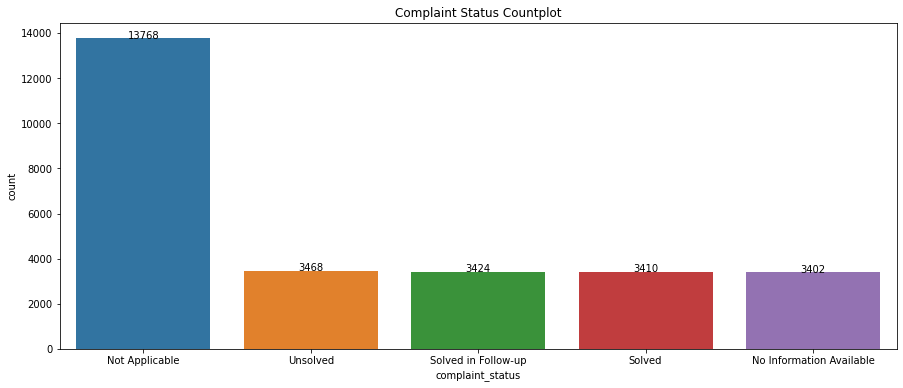

In [62]:
# visualizing the data using count plot
# majority of the complaint status is not applicable

fig, ax12 = plt.subplots(figsize=(15,6))
graph = sns.countplot(data=df, ax = ax12, x = 'complaint_status', order= df['complaint_status'].value_counts().index);
plt.title('Complaint Status Countplot');

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 1, df['complaint_status'].value_counts()[i], ha="center")
    i += 1

Feedback Column

In [63]:
# checking the value of this column

df['feedback'].value_counts()

Poor Product Quality        4690
Too many ads                4674
Poor Website                4657
No reason specified         4655
Poor Customer Service       4635
User Friendly Website       1053
Quality Customer Care       1038
Products always in Stock    1035
Reasonable Price            1035
Name: feedback, dtype: int64

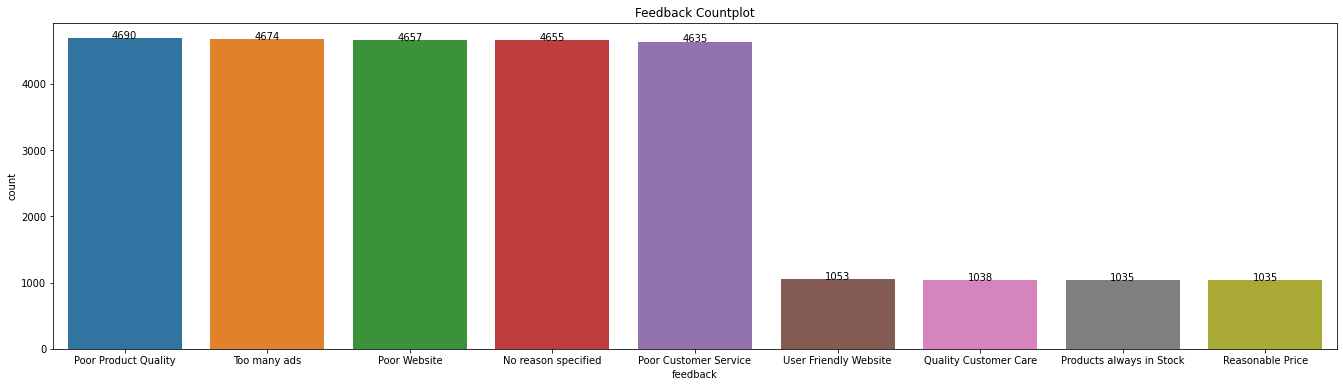

In [64]:
# visualizing data using count plot
# as you can see, there are several majority data

fig, ax13 = plt.subplots(figsize=(23,6))
graph = sns.countplot(data=df, ax = ax13, x = 'feedback', order= df['feedback'].value_counts().index);
plt.title('Feedback Countplot');

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 1, df['feedback'].value_counts()[i], ha="center")
    i += 1

**NUMERICAL CORRELATION CHECKING**

In [65]:
corr = df.corr()
pd.DataFrame(corr.iloc[:, 6])

,churn_risk_score
age,0.002941
days_since_last_login,0.026532
avg_time_spent,-0.025878
avg_transaction_value,-0.221512
avg_frequency_login_days,-0.008851
points_in_wallet,-0.337545
churn_risk_score,1.000000


**DATA CASTING**

In [66]:
# why now you might ask?

# that's because to improve your coding skills, get used to your keyboard
# and practice your eyes. As a beginner, this really helps me

df = df.drop(['Name','customer_id','security_no','joining_date',
        'referral_id','last_visit_time','age'], axis=1)

In [67]:
# one hot encoding (categorical) and data casting (numerical)

df = pd.get_dummies(df, columns=['gender','region_category','membership_category',
                            'joined_through_referral','preferred_offer_types',
                            'medium_of_operation','internet_option','used_special_discount',
                            'offer_application_preference','past_complaint',
                            'complaint_status','feedback'], prefix='', prefix_sep='')


df['days_since_last_login'] = df['days_since_last_login'].astype(np.int64)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(np.int64)
df['avg_time_spent'] = df['avg_time_spent'].astype(np.int64)
df['avg_transaction_value'] = df['avg_transaction_value'].astype(np.int64)
df['points_in_wallet'] = df['points_in_wallet'].astype(np.int64)
df['churn_risk_score'] = df['churn_risk_score'].astype(np.int64)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27472 entries, 0 to 36991
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   days_since_last_login     27472 non-null  int64
 1   avg_time_spent            27472 non-null  int64
 2   avg_transaction_value     27472 non-null  int64
 3   avg_frequency_login_days  27472 non-null  int64
 4   points_in_wallet          27472 non-null  int64
 5   churn_risk_score          27472 non-null  int64
 6   F                         27472 non-null  uint8
 7   M                         27472 non-null  uint8
 8   City                      27472 non-null  uint8
 9   Town                      27472 non-null  uint8
 10  Village                   27472 non-null  uint8
 11  Basic Membership          27472 non-null  uint8
 12  Gold Membership           27472 non-null  uint8
 13  No Membership             27472 non-null  uint8
 14  Platinum Membership       27472 non-nu

**MODELLING**

In [69]:
# label encoding
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, df.columns != 'churn_risk_score'].values
y = df.iloc[:, df.columns == 'churn_risk_score'].values

le = LabelEncoder()
y = le.fit_transform(y)

In [70]:
# data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

scale_X = StandardScaler()

X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)   

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of KNN model is', "{:.2f}".format(accuracy * 100),'%')
print()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred)}")

Accuracy of KNN model is 60.56 %

[[ 453  357    0    0    0]
 [ 373  470    0    0    0]
 [   0    3 2404  731   38]
 [   0    0  822 1208 1072]
 [   0    0   99  839 2120]]

MEA: 0.40686140686140687


In [72]:
"""
k_range = range(1, 50)
k_scores = []
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
"""

'\nk_range = range(1, 50)\nk_scores = []\nscores = {}\nscores_list = []\n\nfor k in k_range:\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n    y_pred = knn.predict(X_test)\n    scores[k] = metrics.accuracy_score(y_test, y_pred)\n    scores_list.append(metrics.accuracy_score(y_test, y_pred))\n'

In [73]:
"""
plt.figure(figsize = (10, 6))
plt.plot(k_range, scores_list)
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()
"""

"\nplt.figure(figsize = (10, 6))\nplt.plot(k_range, scores_list)\nplt.grid()\nplt.xlabel('Value of K')\nplt.ylabel('Accuracy')\nplt.show()\n"

In [74]:
knn = KNeighborsClassifier(n_neighbors=49) 

knn.fit(X_train, y_train)

y_pred2 = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('Accuracy of KNN model with the best K value is', "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred2))

cm = confusion_matrix(y_test, y_pred2)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred2)}")

Accuracy of KNN model with the best K value is 66.71 %

              precision    recall  f1-score   support

           0       0.59      0.71      0.64       810
           1       0.64      0.52      0.58       843
           2       0.80      0.76      0.78      3176
           3       0.52      0.34      0.41      3102
           4       0.67      0.93      0.78      3058

    accuracy                           0.67     10989
   macro avg       0.64      0.65      0.64     10989
weighted avg       0.66      0.67      0.65     10989

[[ 573  237    0    0    0]
 [ 403  440    0    0    0]
 [   0    4 2404  767    1]
 [   0    1  615 1065 1421]
 [   1    1    2  205 2849]]

MEA: 0.3336973336973337


Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn import metrics 

clf = RandomForestClassifier(n_estimators = 150) 
 
clf.fit(X_train, y_train)
 
y_pred3 = clf.predict(X_test)
pred = pd.DataFrame(y_pred3, columns=['predict'])

accuracy = metrics.accuracy_score(y_test,y_pred3)

print("Accuracy of Random Forest Model is: ", "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred3))

cm = confusion_matrix(y_test, y_pred3)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred3)}")
print()

Accuracy of Random Forest Model is:  78.77 %

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       810
           1       0.79      0.75      0.77       843
           2       0.89      0.94      0.92      3176
           3       0.74      0.57      0.64      3102
           4       0.73      0.86      0.79      3058

    accuracy                           0.79     10989
   macro avg       0.78      0.78      0.78     10989
weighted avg       0.79      0.79      0.78     10989

[[ 636  174    0    0    0]
 [ 207  636    0    0    0]
 [   0    0 3001  175    0]
 [   0    0  353 1759  990]
 [   0    0    0  434 2624]]

MEA: 0.2123032123032123



Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

logreg = LogisticRegression()
result = logreg.fit(X_train, y_train)

y_pred4 = logreg.predict(X_test)
pred = pd.DataFrame(y_pred4, columns=['predict'])

accuracy = accuracy_score(y_test, y_pred4)
print('Accuracy of Logistic Regression model is', "{:.2f}".format(accuracy * 100),'%')
print()

cm = confusion_matrix(y_test, y_pred4)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred4)}")
print()

Accuracy of Logistic Regression model is 73.56 %

[[ 676  134    0    0    0]
 [ 473  370    0    0    0]
 [   0    0 2833  343    0]
 [   0    0  346 1318 1438]
 [   0    0    0  172 2886]]

MEA: 0.26444626444626446



SVM

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

model1 = SVC(kernel = 'linear', random_state = 0)
clf = model1.fit(X_train, y_train)

y_pred5 = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print('Accuracy of SVM (Linear Kernel) model is', "{:.2f}".format(accuracy * 100),'%')
print()

cm = confusion_matrix(y_test, y_pred5)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred5)}")
print()

Accuracy of SVM (Linear Kernel) model is 75.42 %

[[ 755   55    0    0    0]
 [ 570  273    0    0    0]
 [   0    0 2977  199    0]
 [   0    0  337 1225 1540]
 [   0    0    0    0 3058]]

MEA: 0.24579124579124578



In [78]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

model = SVC(kernel = 'rbf', random_state = 0)
clf = model.fit(X_train, y_train)

y_pred6 = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred6)
print('Accuracy of SVM (Gaussian Kernel) model is', "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred6))

cm = confusion_matrix(y_test, y_pred6)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred6)}")
print()

Accuracy of SVM (Gaussian Kernel) model is 69.52 %

              precision    recall  f1-score   support

           0       0.58      0.74      0.65       810
           1       0.65      0.48      0.55       843
           2       0.81      0.83      0.82      3176
           3       0.63      0.32      0.43      3102
           4       0.67      0.98      0.79      3058

    accuracy                           0.70     10989
   macro avg       0.67      0.67      0.65     10989
weighted avg       0.69      0.70      0.67     10989

[[ 600  210    0    0    0]
 [ 440  403    0    0    0]
 [   0    4 2639  533    0]
 [   0    1  602 1001 1498]
 [   0    2    0   59 2997]]

MEA: 0.3052143052143052



XGBOOST

In [82]:
import xgboost 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

modelXGB = XGBClassifier(booster = 'gbtree', eval_metric = 'merror')
modelXGB.fit(X_train, y_train)

y_pred7 = modelXGB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred7)
print('Accuracy of XGBoost model is', "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred7))

cm = confusion_matrix(y_test, y_pred7)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred7)}")
print()

Accuracy of XGBoost model is 79.07 %

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       810
           1       0.79      0.73      0.76       843
           2       0.93      0.93      0.93      3176
           3       0.71      0.66      0.68      3102
           4       0.75      0.80      0.77      3058

    accuracy                           0.79     10989
   macro avg       0.78      0.78      0.78     10989
weighted avg       0.79      0.79      0.79     10989

[[ 645  165    0    0    0]
 [ 225  618    0    0    0]
 [   0    0 2953  223    0]
 [   0    0  234 2040  828]
 [   0    0    0  625 2433]]

MEA: 0.2093002093002093



In [80]:
# checking any error and invalid data

print((df < 0).any().sum())
print((df == np.inf).any().sum())
print((df == -np.inf).any().sum())
print((df == np.nan).any().sum())
print((df == np.negative).any().sum())

0
0
0
0
0
